In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation, visualization and useful functions
import pandas as pd
import numpy as np
from itertools import product # iterative combinations
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General(Statistics/Econometrics)
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error
# for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers import SimpleRNN, LSTM, GRU

In [ ]:
#   /content/drive/MyDrive/dataset/kaggle/Bitcoin.csv

In [3]:
raw_all = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Bitcoin.csv', index_col='Date')
raw_all.index = pd.to_datetime(raw_all.index)
raw_all.head()


,BTC-USD
Date,
2017-01-01,998.325012
2017-01-02,1021.750000
2017-01-03,1043.839966
2017-01-04,1154.729980
2017-01-05,1013.380005


In [4]:
raw_all.tail()

,BTC-USD
Date,
2020-10-27,13654.21875
2020-10-28,13271.28516
2020-10-29,13437.88281
2020-10-30,13546.52246
2020-10-31,13780.99512


In [5]:
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1400 entries, 2017-01-01 to 2020-10-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC-USD  1400 non-null   float64
dtypes: float64(1)
memory usage: 21.9 KB


In [7]:
# Parameters
criteria = '2020-01-01' 
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.StandardScaler()
# scaler = preprocessing.RobustScaler()
sequence = 60
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0


In [ ]:
# train = raw_all.loc[raw_all.index < criteria, : ]

In [8]:
train = raw_all.loc[raw_all.index < criteria, :]
test = raw_all.loc[raw_all.index >= criteria, :]
print('Train_size:', train.shape, 'Test_size:', test.shape)


Train_size: (1095, 1) Test_size: (305, 1)


In [9]:
#scaling
train_scaled = scaler.fit_transform(train)
test_scaled  = scaler.fit_transform(test)


In [10]:
# scaling
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)


In [11]:
## X / Y Split
X_train, Y_train = [], []
for index in range(len(train_scaled) - sequence): # 1035
    X_train.append(train_scaled[index: index + sequence])
    Y_train.append(train_scaled[index + sequence])
X_test, Y_test = [], []
for index in range(len(test_scaled) - sequence):
    X_test.append(test_scaled[index: index + sequence])
    Y_test.append(test_scaled[index + sequence])


In [14]:
len(train_scaled) - sequence

1035

In [12]:
len(test_scaled) - sequence

245

In [15]:
X_train[0]

array([[0.0117827 ],
       [0.01303406],
       [0.0142141 ],
       [0.02013783],
       [0.01258694],
       [0.00664777],
       [0.00698881],
       [0.00712845],
       [0.00668127],
       [0.00694041],
       [0.        ],
       [0.00144645],
       [0.00246944],
       [0.00217178],
       [0.00235266],
       [0.00287276],
       [0.00695424],
       [0.00581533],
       [0.00648068],
       [0.00626449],
       [0.00769416],
       [0.00784822],
       [0.00765266],
       [0.00613954],
       [0.00661257],
       [0.00746964],
       [0.00758524],
       [0.00768353],
       [0.00757167],
       [0.007619  ],
       [0.01029111],
       [0.01128579],
       [0.01250253],
       [0.01346997],
       [0.01416389],
       [0.01333268],
       [0.01391015],
       [0.01514949],
       [0.01524137],
       [0.01157212],
       [0.01126715],
       [0.0121099 ],
       [0.01182843],
       [0.01137228],
       [0.01211524],
       [0.01227176],
       [0.01333802],
       [0.014

In [ ]:
#X_train, Y_train = np.array(X_train), np.array(Y-train)
#X_test, Y_test = np.array(X_test), np.array(Y-test)


In [16]:
# Reshape
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)


X_train: (1035, 60, 1) Y_train: (1035, 1)
X_test: (245, 60, 1) Y_test: (245, 1)


In [17]:
# 다층 퍼셉트론(multi-layer perceptron, MLP)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)


X_train: (1035, 60) Y_train: (1035, 1)
X_test: (245, 60) Y_test: (245, 1)


In [18]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7808      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [19]:
model_fit = model.fit(X_train, Y_train,
                      batch_size=batch_size,
                      epochs=epoch,
                      verbose=verbose)


Epoch 1/10
33/33 [==============================] - 13s 2ms/step - loss: 0.0399
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 9.3609e-04
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 9.6846e-04
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 8.6000e-04
Epoch 10/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0012


In [20]:
model_fit.history

{'loss': [0.014987429603934288,
  0.002010166412219405,
  0.001465677167288959,
  0.0012207735562697053,
  0.001021879375912249,
  0.0008720887708477676,
  0.001463521271944046,
  0.0015912165399640799,
  0.0008996413089334965,
  0.0010416127042844892]}

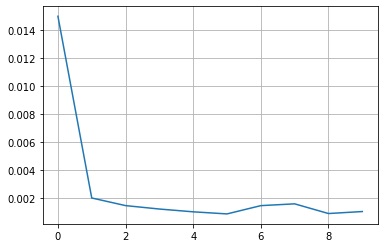

In [21]:
plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()


In [22]:
#prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)


In [23]:
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual


def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te

,MAE,MSE,MAPE
Train,198.083987,74279.998580,2.387935
Test,481.110645,391893.653649,5.325308


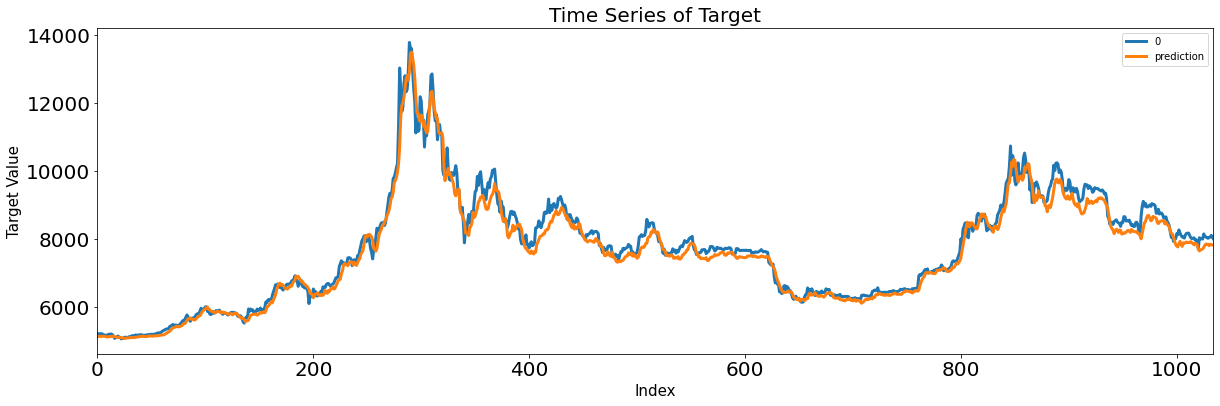

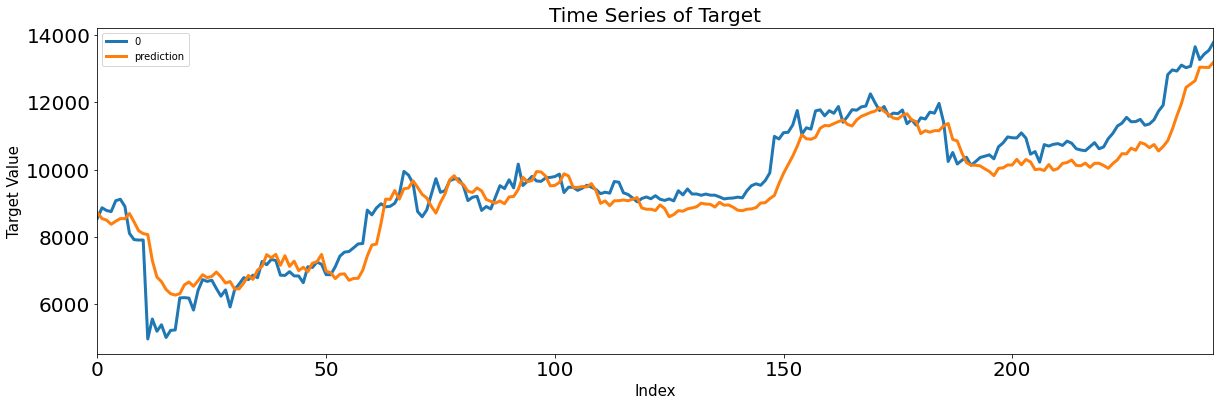

In [24]:
if scaler != []:
    Y_train = scaler.inverse_transform(Y_train)
    Y_train_pred = scaler.inverse_transform(Y_train_pred)
    Y_test = scaler.inverse_transform(Y_test)
    Y_test_pred = scaler.inverse_transform(Y_test_pred)
Score_MLP, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_MLP)


Train_size: (1095, 1) Test_size: (305, 1)
X_train: (1035, 60, 1) Y_train: (1035, 1)
X_test: (245, 60, 1) Y_test: (245, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 60, 128)           16640     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 60, 256)           98560     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 256)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 60, 128)           49280     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 128)           0        

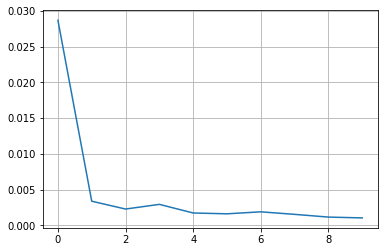

8/8 [==============================] - 2s 25ms/step - loss: 1.8525e-15


,MAE,MSE,MAPE
Train,553.436054,564185.964381,8.530728
Test,805.669669,790458.513770,8.638790


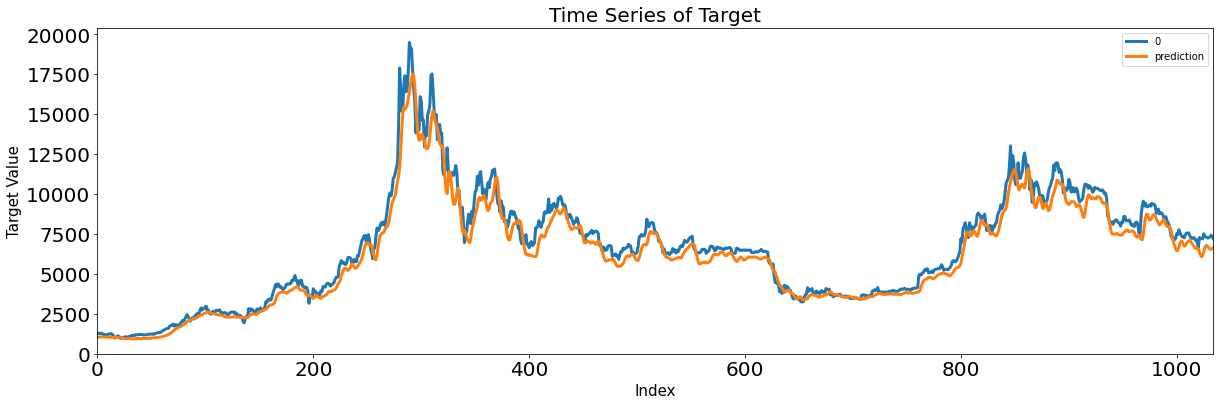

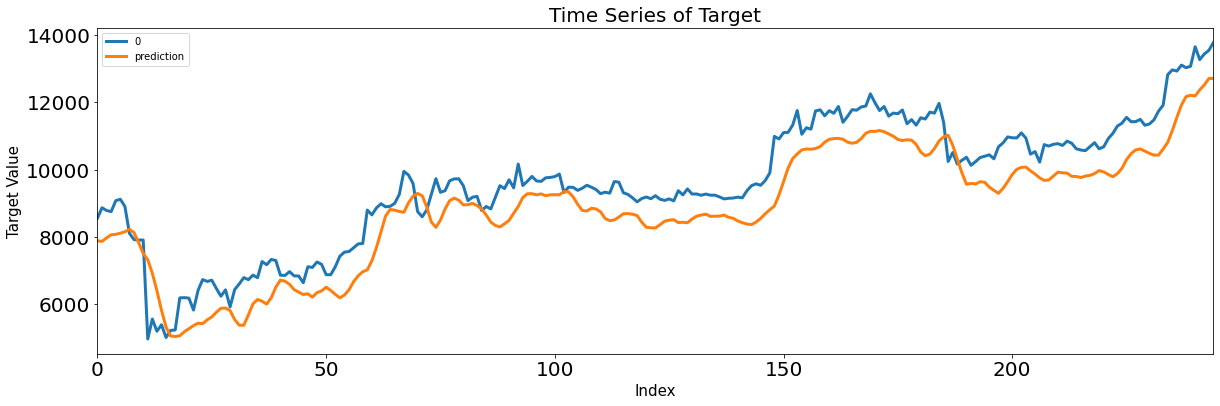

In [26]:
# RNN
location = '/content/drive/MyDrive/dataset/kaggle/Bitcoin.csv'
raw_all = pd.read_csv(location, index_col='Date')
raw_all.index = pd.to_datetime(raw_all.index)

# Parameters
criteria = '2020-01-01'
scaler = preprocessing.MinMaxScaler()
sequence = 60
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Train & Test Split
train = raw_all.loc[raw_all.index < criteria,:]
test = raw_all.loc[raw_all.index >= criteria,:]
print('Train_size:', train.shape, 'Test_size:', test.shape)

## Scaling
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(train_scaled) - sequence):
    X_train.append(train_scaled[index: index + sequence])
    Y_train.append(train_scaled[index + sequence])
X_test, Y_test = [], []
for index in range(len(test_scaled) - sequence):
    X_test.append(test_scaled[index: index + sequence])
    Y_test.append(test_scaled[index + sequence])

## Retype and Reshape
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# RNN
model = Sequential()
model.add(SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(256, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(128, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(64, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train, 
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler != []:
    Y_train = scaler.inverse_transform(Y_train)
    Y_train_pred = scaler.inverse_transform(Y_train_pred)
    Y_test = scaler.inverse_transform(Y_test)
    Y_test_pred = scaler.inverse_transform(Y_test_pred)
Score_RNN, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_RNN)